In [35]:
#obtain data from https://www.ourcommons.ca/en/open-data that is https://www.ourcommons.ca/Members/en/votes

import pandas as pd
dfs = pd.read_html('https://www.ourcommons.ca/Members/en/votes/43/2/185',header=0) #185th vote of 2nd session of 43rd parlamaint

In [36]:
df = dfs[0] #to obtain the data ??? data only exists in first fosition of dfs

In [37]:
#single vote
df.shape #332 members had casted vote for this bill

(332, 4)

In [38]:
df.columns = ['Member','Party','Vote','Paired'] #rename the column headers

In [39]:
df['Party'].value_counts().to_frame() #distribution per party .value_counts() method

,Party
Liberal,152
Conservative,118
Bloc Québécois,32
NDP,23
Independent,5
Green Party,2


In [40]:
df['Vote'].value_counts().to_frame() #distribution per vote Y or N

,Vote
Yea,211
Nay,121


In [63]:
#all votes 44TH PARLIAMENT, 1st SESSION 
# TypeId=3 in URL returns only government bills, TypeId=4 returns only private members bills

#dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=44-1&billDocumentTypeId=3',header=0)
dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=44-1&billDocumentTypeId=4',header=0)
vote_list = dfs_vote_list[0]

In [67]:
#[initialize global variables:]
#count type variables for collection of data set to 0 initially
# party line and non party line variable for each party so we’ll know how many of each category we’ve seen
total_votes = 0
partyLineVotesConservative = 0 
non_partyLineVotesConservative = 0
partyLineVotesLiberal = 0 
non_partyLineVotesLiberal = 0
partyLineVotesNDP = 0 
non_partyLineVotesNDP = 0
partyLineVotesBloc = 0 
non_partyLineVotesBloc = 0
partyLineVotesIndependent = 0 
non_partyLineVotesIndependent = 0
partyLineVotesGreen = 0 
non_partyLineVotesGreen = 0

In [68]:
#function to gather the results
# Functions for categorizing and tabulating votes by party:
#iterate through four functions - one for each party
def liberal_votes():
    global partyLineVotesLiberal 
    global non_partyLineVotesLiberal
    
    df_party = df[df['Party'].str.contains('Liberal')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesLiberal += 1
    else:
        partyLineVotesLiberal += 1
    
def conservative_votes():
    global partyLineVotesConservative 
    global non_partyLineVotesConservative
    
    df_party = df[df['Party'].str.contains('Conservative')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesConservative += 1
    else:
        partyLineVotesConservative += 1
        
def ndp_votes():
    global partyLineVotesNDP 
    global non_partyLineVotesNDP

    df_party = df[df['Party'].str.contains('NDP')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesNDP += 1
    else:
        partyLineVotesNDP += 1
    
def bloc_votes():
    global partyLineVotesBloc 
    global non_partyLineVotesBloc

    df_party = df[df['Party'].str.contains('Bloc')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesBloc += 1
    else:
        partyLineVotesBloc += 1
        
def independent_votes():
    global partyLineVotesIndependent 
    global non_partyLineVotesIndependent

    df_party = df[df['Party'].str.contains('Indep')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesIndependent += 1
    else:
        partyLineVotesIndependent += 1
        
def green_votes():
    global partyLineVotesGreen
    global non_partyLineVotesGreen

    df_party = df[df['Party'].str.contains('Gree')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesGreen += 1
    else:
        partyLineVotesGreen += 1

In [66]:
# Build URL list from master Votes page: - list of the URLs we’ll be scraping

#dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=44-1&billDocumentTypeId=3',header=0) #government bills
dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=44-1&billDocumentTypeId=4',header=0) #private bills

vote_list = dfs_vote_list[0]
vote_list.columns = ['Number','Type','Subject','Votes','Result','Date']
vote_list['Number'] = vote_list['Number'].str.extract('(\d+)', expand=False) #strip out all non-numeric characters, leaving us with just the numbers themselves
base_url = "https://www.ourcommons.ca/Members/en/votes/44/1/"

In [69]:
url_data = pd.DataFrame(columns=["Vote"]) #new dataframe to contain our set of production-ready URLs
Vote = []
for name in vote_list['Number']:
    newUrl = base_url + name
    Vote.append(newUrl)
url_data["Vote"] = Vote

In [70]:
# Run this only once!!!
#as it will add a second (or third) identical set of URLs to the file, doubling (or tripling) 
# the number of requests your program will make.

#url_data.to_csv(r'url-text-44-1-government.csv', header=None, index=None, sep=' ', mode='a') #if 3 is selected government bills
url_data.to_csv(r'url-text-44-1-privatemembers.csv',  header=None, index=None, sep=' ', mode='a') #if 4 is selected private bills

In [71]:
# Read URLs - Tends to render rather long ~ 8:00 min for 3, and ~3:00 for 4

#URLS = open("url-text-44-1-government.csv","r") #if 3 is selected government bills
URLS = open("url-text-44-1-privatemembers.csv","r") #if 4 is selected private bills

for url in URLS:
    # Read next HTML page in set:
    dfs = pd.read_html(url,header=0)
    df = dfs[0]
    df.rename(columns={'Member Voted':'Vote'}, inplace=True)
    df.rename(columns={'Political Affiliation':'Party'}, inplace=True)
    # Ignore unanimous votes:
    vote_output_nay = df[df['Vote'].str.contains('Nay', na=False)]
    total_votes_nay = vote_output_nay['Vote'].str.contains('Nay', na=False)
    filtered_votes = total_votes_nay.sum()
    if filtered_votes==0:
        continue
    # Call functions to tabulate votes:
    else:
        liberal_votes()
        conservative_votes()
        ndp_votes()
        bloc_votes()

        total_votes += 1

In [72]:
print("We counted", total_votes, "votes in total.")

print("Conservative members voted the party line", partyLineVotesConservative, 
      "times, and split their vote", non_partyLineVotesConservative, "times.")

print("Liberal members voted the party line", partyLineVotesLiberal, 
      "times, and split their vote", non_partyLineVotesLiberal, "times.")

print("NDP members voted the party line", partyLineVotesNDP, 
      "times, and split their vote", non_partyLineVotesNDP, "times.")
    
print("Bloc members voted the party line", partyLineVotesBloc, 
      "times, and split their vote", non_partyLineVotesBloc, "times.")

print("Independent members voted the party line", partyLineVotesIndependent, 
      "times, and split their vote", non_partyLineVotesIndependent, "times.")

print("Green members voted the party line", partyLineVotesGreen, 
      "times, and split their vote", non_partyLineVotesGreen, "times.")

We counted 13 votes in total.
Conservative members voted the party line 13 times, and split their vote 0 times.
Liberal members voted the party line 4 times, and split their vote 9 times.
NDP members voted the party line 13 times, and split their vote 0 times.
Bloc members voted the party line 13 times, and split their vote 0 times.
Independent members voted the party line 0 times, and split their vote 0 times.
Green members voted the party line 0 times, and split their vote 0 times.


In [74]:
data = {'Party': ['Conservative', 'Liberal', 'NDP', 'Bloc', 'Independent', 'Green'],
'Party-line votes': [13, 4, 13, 13, 0, 0], #manually feed the values in array
'Non-party-line votes': [0, 9, 0, 0, 0, 0]} ##manually feed the values in array
dfdata = pd.DataFrame (data, columns = ['Party', 'Party-line votes', 'Non-party-line votes'])

print(dfdata)

          Party  Party-line votes  Non-party-line votes
0  Conservative                13                     0
1       Liberal                 4                     9
2           NDP                13                     0
3          Bloc                13                     0
4   Independent                 0                     0
5         Green                 0                     0


In [75]:
dfdata['percentage']= dfdata['Non-party-line votes']/dfdata['Party-line votes'].sum()
dfdata

,Party,Party-line votes,Non-party-line votes,percentage
0,Conservative,13,0,0.000000
1,Liberal,4,9,0.209302
2,NDP,13,0,0.000000
3,Bloc,13,0,0.000000
4,Independent,0,0,0.000000
5,Green,0,0,0.000000


<AxesSubplot:>

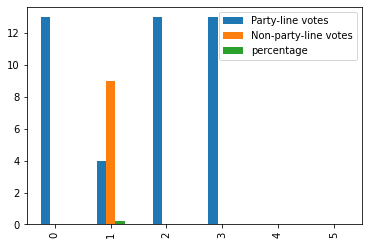

In [76]:
dfdata.plot(kind='bar')